## PUNTO 1 

##### Seg√∫n el INDEC, una persona es considerada desocupada si durante la semana que se toma como referencia no tuvo trabajo, pero estaba disponible para empezar a trabajar y adem√°s estuvo buscando activamente empleo en las √∫ltimas cuatro semanas. Esta b√∫squeda puede ser de distintas formas, como mandar curr√≠culums, buscar avisos, hablar con conocidos, entre otras.

##### Esta clasificaci√≥n se realiza a trav√©s de la Encuesta Permanente de Hogares (EPH), que es una herramienta que utiliza el INDEC para conocer la situaci√≥n laboral, educativa y habitacional de la poblaci√≥n. Es importante aclarar que si una persona no tiene trabajo, pero tampoco busc√≥ activamente, no se la cuenta como desocupada, sino como inactiva.

##### Tambi√©n existe otra categor√≠a llamada "ocupados demandantes", que son personas que s√≠ tienen trabajo, pero est√°n buscando uno mejor o m√°s horas de trabajo. Todo esto ayuda a entender mejor el mercado laboral y c√≥mo evoluciona el desempleo en el pa√≠s.



## PUNTO 2 (A)

#### ACLARACI√ìN: PARA REALIZAR LA UNION DE BASE DE DATOS, UTILIZAMOS EL ARCHIVO DTA.2004 Y LO TRANSFORMAMOS EN UN ARCHIVO 2004.XLSX, PARA QUE LOS DATOS QUEDEN MAS CLARO Y ASI DISMINUIR LOS ERRORES

In [3]:
import pandas as pd

# Cargarmos los archivos Excel 
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  
# Filtramos la region que elegimos en este caso la pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar la regi√≥n Pampeana en 2024 (el codigo es el 43)
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# Unimos ambos DataFrames (2004 y 2024) en una sola base de datos
df_final = pd.concat([df_2004_pampeana, df_2024_pampeana], ignore_index=True)

# Guardarmos el resultado final en un nuevo archivo Excel
df_final.to_excel('resultado_pampeana.xlsx', index=False)

# Imprimir las primeras filas del resultado para verificar si es correcto el resultado
print(df_final.head())


   CODUSU  nro_hogar componente h15    ano4       trimestre    region mas_500  \
0  125051        1.0          1  SÔøΩ  2004.0  1er. Trimestre  Pampeana       S   
1  125051        1.0          2  SÔøΩ  2004.0  1er. Trimestre  Pampeana       S   
2  125051        1.0          3  SÔøΩ  2004.0  1er. Trimestre  Pampeana       S   
3  125051        1.0          4  SÔøΩ  2004.0  1er. Trimestre  Pampeana       S   
4  125051        1.0          5   0  2004.0  1er. Trimestre  Pampeana       S   

      aglomerado  pondera  ... PDECIFR ADECIFR IPCF DECCFR IDECCFR RDECCFR  \
0  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
1  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
2  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
3  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
4  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   

  GDECCFR PDECCFR ADECCFR PONDIH  
0

## PUNTO 2 (B)

### 2004

In [1]:
import pandas as pd

# Cargarmos los datos del 2004
df_2004 = pd.read_excel("usu_individual_T104.xlsx")

# Filtramos los datos para la regi√≥n Pampeana 
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Seleccionamos las 15 variables
variables = ['ch03', 'ch04', 'nivel_ed', 'ch14', "idecocur" , "decocur", "pp11t", "ch06", "ch07", "ch08", "ch12", "cat_inac","pp04a","estado","ch16"]
df_2004_pampeana_vars = df_2004_pampeana[variables].copy()

# Verificamos celdas vac√≠as: vamos a contar "" (cadenas vac√≠as) y espacios en blanco
faltantes_2004_pampeana = df_2004_pampeana_vars.apply(lambda x: x.str.strip() == '').sum()

# Crear un DataFrame para mostrar los resultados
faltantes_2004_pampeana = pd.DataFrame({
    'Variable': faltantes_2004_pampeana.index,
    'Cantidad de Faltantes': faltantes_2004_pampeana.values
})

# Imprimir resultados
print("Valores vac√≠os o inconclusos para la region pampeana (2004):\n")
print(faltantes_2004_pampeana.to_string(index=False))



Valores vac√≠os o inconclusos para la region pampeana (2004):

Variable  Cantidad de Faltantes
    ch03                      0
    ch04                      0
nivel_ed                      0
    ch14                   7138
idecocur                   9139
 decocur                   9139
   pp11t                      0
    ch06                      0
    ch07                      0
    ch08                      0
    ch12                      0
cat_inac                      0
   pp04a                      0
  estado                      0
    ch16                      0


## 2024

In [2]:
import pandas as pd

# Cargamos el archivo Excel del a√±o 2024
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

# Filtramos la regi√≥n Pampeana (43)
df_pampeana = df_2024[df_2024['REGION'] == 43].copy()

# Seleccionamos 15 variables de inter√©s
variables_interes = [
    'CH03', 'CH04', 'CH06', 'CH07', 'NIVEL_ED', 
    'ESTADO', 'CAT_OCUP', 'PP04A', 'PP04B_COD', 'PP04G',"CH08" , "CH09", "CH10", "CH11","CH12"
]

# Subset del DataFrame con esas variables
df_pampeana_vars = df_pampeana[variables_interes].copy()

# Reemplazamos valores vac√≠os o espacios en blanco con NaN
df_pampeana_vars = df_pampeana_vars.replace(r'^\s*$', pd.NA, regex=True)

# Contamos faltantes por variable
faltantes = df_pampeana_vars.isna().sum()

# Creamos tabla de resultados
tabla_faltantes = pd.DataFrame({
    'Variable': faltantes.index,
    'Cantidad de Faltantes': faltantes.values
})

# Mostrar la tabla
print("Cantidad de valores faltantes por variable (Regi√≥n Pampeana - 2024):\n")
print(tabla_faltantes.to_string(index=False))



Cantidad de valores faltantes por variable (Regi√≥n Pampeana - 2024):

 Variable  Cantidad de Faltantes
     CH03                      0
     CH04                      0
     CH06                      0
     CH07                      0
 NIVEL_ED                      0
   ESTADO                      0
 CAT_OCUP                      0
    PP04A                   8108
PP04B_COD                   8108
    PP04G                   8108
     CH08                      0
     CH09                      0
     CH10                      0
     CH11                      0
     CH12                      0


# CONCLUSION
#### en este caso ambas tienen 3 variables que tienen espacios vac√≠os o inconclusos esto se debe a que no fueron contestados o da√±ados, aunque destacamos que la base de datos del 2024 esta mucho completa y ordenada a la hora de trabajar, ya que en la base de datos del 2004 las respuestas ten√≠an mas variables insistentes, aunque generalmente en las principales √≠tems (sexo, estado civil, ocupaci√≥n) ambas bases de datos tenian completa esa respuestas de manera ordenada y sencilla de interpretar.

## PUNTO 2 (C)

In [ ]:
import pandas as pd

# Cargamos datos 
# df = pd.read_csv("obtenido")

# Listado de variables que necesitemos limpiar
variables_interes = ["variable a analizar"]

# Definimos valores considerados como codificaciones de no respuesta o an√≥malos
valores_invalidos = [-9, -8, -1, 9999999]

# Reemplazamos estos valores por NaN
df[variables_interes] = df[variables_interes].replace(valores_invalidos, pd.NA)

# Adem√°s, eliminamos ingresos negativos que no tienen sentido (si aplica)
df['ingreso_total'] = df['ingreso_total'].mask(df['ingreso_total'] < 0, pd.NA)
df['ingreso_laboral'] = df['ingreso_laboral'].mask(df['ingreso_laboral'] < 0, pd.NA)
df['ingreso_no_laboral'] = df['ingreso_no_laboral'].mask(df['ingreso_no_laboral'] < 0, pd.NA)

# Eliminamos filas que tengan NaN en alguna de las variables de inter√©s
df_limpio = df.dropna(subset=variables_interes)

# Verificamos
print(f"Filas originales: {len(df)}")
print(f"Filas luego de la limpieza: {len(df_limpio)}")


# CONCLUSION
#### EN ESTE CASO NO NOS ENCONTRAMOS CON UN INGRESO NEGATIVO, PERO SI LO TENDRIAMOS UTILIZARAMOS ESTA LINEA DE CODIGO PARA LOGRAR LIMPIAR LOS DATOS 

## PUNTO 3

## 2004

Columnas del archivo:
Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)


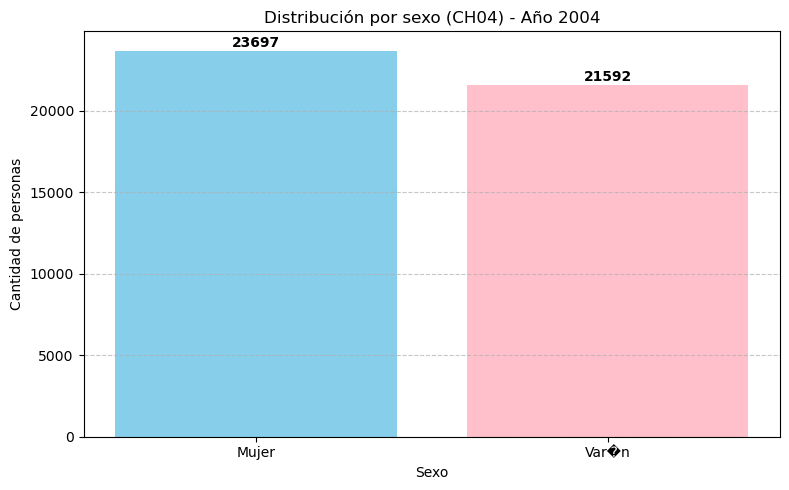


 Comentario:
En 2004 hubo m√°s mujeres que varones.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el archivo Excel (todo el archivo es del a√±o 2004)
archivo = "usu_individual_T104.xlsx"
df = pd.read_excel(archivo)

# Verificamos las columnas 
print("Columnas del archivo:")
print(df.columns)

# Contamos cu√°ntos hay por sexo (columna CH04)
conteo_sexo = df['ch04'].value_counts()

# Creamos gr√°fico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(conteo_sexo.index, conteo_sexo.values, color=['skyblue', 'pink'])

# Agregamos T√≠tulo y etiquetas
plt.title('Distribuci√≥n por sexo (CH04) - A√±o 2004')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregamos etiquetas de cantidad encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 50,  # +50 para que no se superponga
             f'{int(altura)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Comentario en consola
print("\n Comentario:")
varones = conteo_sexo.get('Var√≥n', 0)
mujeres = conteo_sexo.get('Mujer', 0)

if varones > mujeres:
    print(f"En 2004 hubo m√°s varones que mujeres.")
elif mujeres > varones:
    print(f"En 2004 hubo m√°s mujeres que varones.")
else:
    print(f"En 2004 hubo la misma cantidad de varones y mujeres.")



## 2024

Columnas del archivo:
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


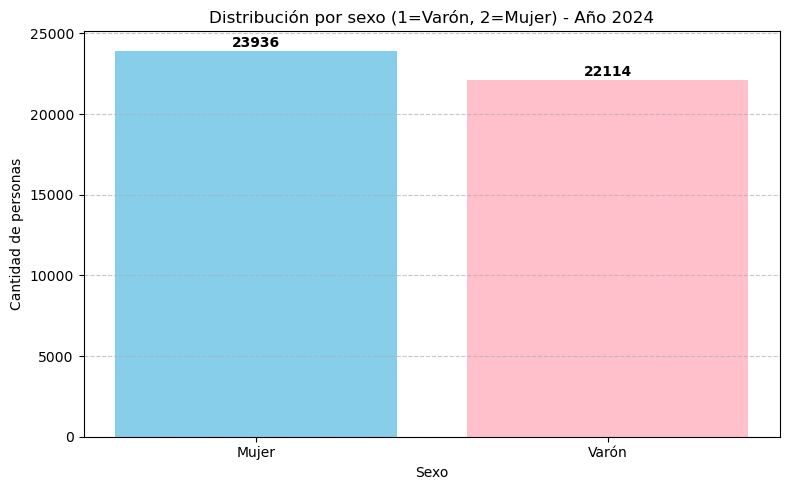

En 2024 hubo m√°s mujereS que varones.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel (todo el archivo corresponde a 2024)
archivo = "usu_individual_T124.xlsx"
df = pd.read_excel(archivo)

# Verificar las columnas (opcional)
print("Columnas del archivo:")
print(df.columns)

# Contar cu√°ntos hay por sexo (discriminado por 1 para varones y 2 para mujeres en la columna 'Sexo')
# Cambiar 'Sexo' al nombre exacto de la columna en tu archivo
conteo_sexo = df['CH04'].value_counts()

# Mapear 1 -> Var√≥n, 2 -> Mujer 
conteo_sexo.index = conteo_sexo.index.map({1: 'Var√≥n', 2: 'Mujer'})

# Creamos gr√°fico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(conteo_sexo.index, conteo_sexo.values, color=['skyblue', 'pink'])

# agregamos T√≠tulos y etiquetas
plt.title('Distribuci√≥n por sexo (1=Var√≥n, 2=Mujer) - A√±o 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregamos etiquetas de cantidad encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 50,  # +50 para que no se superponga
             f'{int(altura)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Comentario en consola
varones = conteo_sexo.get('Var√≥n', 0)
mujeres = conteo_sexo.get('Mujer', 0)

if varones > mujeres:
    print(f"En 2024 hubo m√°s varones que mujeres.")
elif mujeres > varones:
    print(f"En 2024 hubo m√°s mujereS que varones.")
else:
    print(f"En 2024 hubo la misma cantidad de varones y mujeres.")


In [ ]:
PUNTO 5

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Cargarmos los archivos Excel 
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx') 

# Filtramos la region que elegimos en este caso la pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar la regi√≥n Pampeana en 2024 (el codigo es el 43)
df_2024_pampeana = df_2024[df_2024['REGION'] == 43] 

print("Columnas del archivo 2004:")
print(df_2004.columns)

print("\nColumnas del archivo 2024:")
print(df_2024.columns) 


Columnas del archivo 2004:
Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)

Columnas del archivo 2024:
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivos
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  

# Normalizar nombres de columnas
df_2004.columns = df_2004.columns.str.strip().str.lower()  # min√∫sculas para 2004
df_2024.columns = df_2024.columns.str.strip().str.upper()  # may√∫sculas para 2024

# Filtrar regi√≥n pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 43]
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# Columnas de inter√©s
columnas_2004 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
columnas_2024 = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Filtrar columnas
df_2004_filtrado = df_2004_pampeana[columnas_2004].copy()
df_2024_filtrado = df_2024_pampeana[columnas_2024].copy()

# Renombrar columnas del 2024 a min√∫sculas para unificarlas
df_2024_filtrado.columns = [col.lower() for col in df_2024_filtrado.columns]

# Agregar columna de a√±o
df_2004_filtrado['a√±o'] = 2004
df_2024_filtrado['a√±o'] = 2024

# Unir ambos DataFrames
df_total = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

# Mostrar primeras filas
print(df_total.head())



  ch04 ch06 ch07 ch08 nivel_ed estado cat_inac       ipcf   a√±o
0    2   57    3    1        6      1        0       0.00  2024
1    1   35    5    1        6      1        0       0.00  2024
2    1   46    5    4        3      1        0  266666.67  2024
3    2   48    5    1        6      1        0  266666.67  2024
4    2   43    2    1        2      2        0   87500.00  2024


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivos
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  

# Normalizar nombres de columnas
df_2004.columns = df_2004.columns.str.strip().str.lower()  # min√∫sculas para 2004
df_2024.columns = df_2024.columns.str.strip().str.upper()  # may√∫sculas para 2024

# Filtrar regi√≥n pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# Columnas de inter√©s
columnas_2004 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
columnas_2024 = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Filtrar columnas
df_2004_filtrado = df_2004_pampeana[columnas_2004].copy()
df_2024_filtrado = df_2024_pampeana[columnas_2024].copy()

# Renombrar columnas del 2024 a min√∫sculas para unificarlas
df_2024_filtrado.columns = [col.lower() for col in df_2024_filtrado.columns]

# Agregar columna de a√±o
df_2004_filtrado['a√±o'] = 2004
df_2024_filtrado['a√±o'] = 2024

# Unir ambos DataFrames
df_total = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

# Mostrar primeras filas
print(df_total.head())



    ch04 ch06     ch07                      ch08  \
0  VarÔøΩn   52   Casado  No paga ni le descuentan   
1  Mujer   40   Casado  No paga ni le descuentan   
2  Mujer   19  Soltero  No paga ni le descuentan   
3  VarÔøΩn   14  Soltero  No paga ni le descuentan   
4  VarÔøΩn    9  Soltero  No paga ni le descuentan   

                                           nivel_ed            estado  \
0                             Secundaria Incompleta           Ocupado   
1                             Secundaria Incompleta           Ocupado   
2                               Secundaria Completa           Ocupado   
3                             Secundaria Incompleta          Inactivo   
4  Primaria Incompleta (incluye educaciÔøΩn especial)  Menor de 10 aÔøΩos   

     cat_inac  ipcf   a√±o  
0           0  71.4  2004  
1           0  71.4  2004  
2           0  71.4  2004  
3  Estudiante  71.4  2004  
4  Estudiante  71.4  2004  


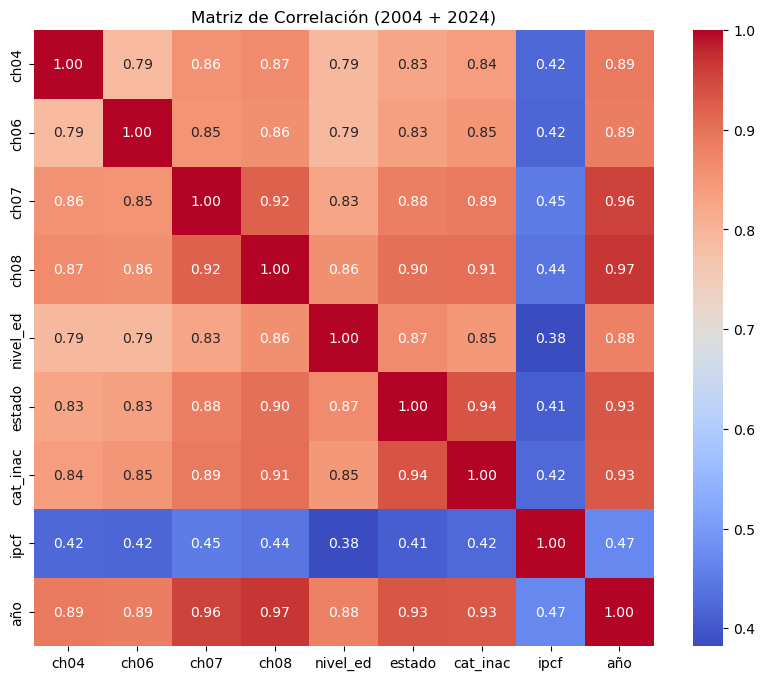

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hacemos una copia para no tocar el original
df_corr = df_total.copy()

# Convertimos columnas categ√≥ricas en n√∫meros
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col], _ = pd.factorize(df_corr[col])

# Calculamos la matriz de correlaci√≥n
corr_matrix = df_corr.corr(numeric_only=True)

# Mostramos la matriz con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaci√≥n (2004 + 2024)")
plt.show() 

In [ ]:
CONCLUSIONES PUNTO 4: La tabla muestra una matriz de correlaci√≥n, donde cada celda representa el coeficiente de correlaci√≥n de Pearson (r) entre dos variables. Este valor indica la relaci√≥n lineal entre ellas, con un rango de -1 a 1:

1: Correlaci√≥n positiva perfecta (si una variable aumenta, la otra tambi√©n).

-1: Correlaci√≥n negativa perfecta (si una variable aumenta, la otra disminuye).

0: No hay correlaci√≥n lineal.

En la Matriz de correlacion las variables de edad, estado civil, nivel educativo, estado de actividad tienen alta correlacion entre si, indicando que estan bastante relacionadas. Por ejemplo, a mayor edad es esperable un mayor nivel educativo o cambios en el estado civil. 
La variable a√±o tambien tiene alta correlacion con casi todas, lo cual es normal en analisis longitudinales: los perfiles demograficos cambian con el tiempo.
En cambio el ingreso per capita de familia tiene baja correlacion con las demas variables ya que es una variable economica con muchas variabilidad. ( A diferencia de las otras variables que son mas estructurales).


In [23]:
#EJERCICO 5

import pandas as pd

# Cargar archivos
df_2004 = pd.read_excel('usu_individual_T104.xlsx')
df_2024 = pd.read_excel('usu_individual_T124.xlsx')

# 1. Definir estados v√°lidos en todas sus posibles variantes
estados_posibles = {
    'ocupado': ['Ocupado', 'OCUPADO', 'ocupado', 1, '1'],
    'desocupado': ['Desocupado', 'DESOCUPADO', 'desocupado', 2, '2'],
    'inactivo': ['Inactivo', 'INACTIVO', 'inactivo', 3, '3']
}

# 2. Funci√≥n para normalizar cualquier formato a clave estandarizada
def normalizar_estado(estado):
    if pd.isna(estado):
        return None
    estado_str = str(estado).strip().lower()
    for key, variants in estados_posibles.items():
        if estado_str in [str(v).lower().strip() for v in variants]:
            return key
    return None

# 3. Filtrar regi√≥n pampeana
df_2004_pampeana = df_2004[df_2004['region'].str.lower() == 'pampeana']
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# 4. Normalizar estados en ambos dataframes
df_2004_filtrado = df_2004_pampeana.copy()
df_2004_filtrado['estado_normalizado'] = df_2004_pampeana['estado'].apply(normalizar_estado)

df_2024_filtrado = df_2024_pampeana.copy()
df_2024_filtrado['estado_normalizado'] = df_2024_pampeana['ESTADO'].apply(normalizar_estado)  

# 5. Filtrar solo los estados v√°lidos
df_2004_filtrado = df_2004_filtrado.dropna(subset=['estado_normalizado'])
df_2024_filtrado = df_2024_filtrado.dropna(subset=['estado_normalizado'])

# 6. Conteo y media IPCF
conteo_2004 = df_2004_filtrado['estado_normalizado'].value_counts()
conteo_2024 = df_2024_filtrado['estado_normalizado'].value_counts()

media_ipcf_2004 = df_2004_filtrado.groupby('estado_normalizado')['ipcf'].mean().round(2)
media_ipcf_2024 = df_2024_filtrado.groupby('estado_normalizado')['IPCF'].mean().round(2)

# 7. Resultados
print("üìÖ 2004 - Cantidad por estado:")
print(conteo_2004)
print("\nüí∞ IPCF promedio por estado - 2004:")
print(media_ipcf_2004)

print("\nüìÖ 2024 - Cantidad por estado:")
print(conteo_2024)
print("\nüí∞ IPCF promedio por estado - 2024:")
print(media_ipcf_2024)

üìÖ 2004 - Cantidad por estado:
estado_normalizado
inactivo      5812
ocupado       5682
desocupado    1035
Name: count, dtype: int64

üí∞ IPCF promedio por estado - 2004:
estado_normalizado
desocupado    197.42
inactivo      284.24
ocupado       383.96
Name: ipcf, dtype: float64

üìÖ 2024 - Cantidad por estado:
estado_normalizado
ocupado       6302
inactivo      5909
desocupado     453
Name: count, dtype: int64

üí∞ IPCF promedio por estado - 2024:
estado_normalizado
desocupado     99393.79
inactivo      137703.88
ocupado       179600.56
Name: IPCF, dtype: float64


In [25]:
# EJERCICO 6 

import pandas as pd

# Cargar los datos de los archivos con los nombres correctos
df_2024 = pd.read_excel('usu_individual_T124.xlsx')
df_2004 = pd.read_excel('usu_individual_T104.xlsx')

# Filtrar solo la regi√≥n 43 para 2024
df_2024_region_43 = df_2024[df_2024['REGION'] == 43]

# Filtrar las observaciones donde la condici√≥n de actividad es diferente de 0 (respondieron)
respondieron_2024 = df_2024_region_43[df_2024_region_43['ESTADO'] != 0]

# Filtrar las observaciones donde la condici√≥n de actividad es 0 (no respondieron)
norespondieron_2024 = df_2024_region_43[df_2024_region_43['ESTADO'] == 0]

# Filtrar solo la regi√≥n Pampeana para 2004
df_2004_region_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar las observaciones donde la condici√≥n de actividad es diferente de 0 (respondieron)
respondieron_2004 = df_2004_region_pampeana[df_2004_region_pampeana['estado'] != 0]

# Filtrar las observaciones donde la condici√≥n de actividad es 0 (no respondieron)
norespondieron_2004 = df_2004_region_pampeana[df_2004_region_pampeana['estado'] == 0]

# Guardar todo en un solo archivo Excel con m√∫ltiples hojas
with pd.ExcelWriter('datos_respuesta_condicion_actividad_region.xlsx') as writer:
    # Guardar los datos de 2024
    respondieron_2024.to_excel(writer, sheet_name='Respondieron_2024', index=False)
    norespondieron_2024.to_excel(writer, sheet_name='NoRespondieron_2024', index=False)
    
    # Guardar los datos de 2004
    respondieron_2004.to_excel(writer, sheet_name='Respondieron_2004', index=False)
    norespondieron_2004.to_excel(writer, sheet_name='NoRespondieron_2004', index=False)

In [26]:
# Calcular totales
total_2024 = len(df_2024_region_43)
total_2004 = len(df_2004_region_pampeana)

noresp_2024 = len(norespondieron_2024)
noresp_2004 = len(norespondieron_2004)

# Mostrar resultados
print("=== RESUMEN DE NO RESPUESTAS ===")
print(f"A√±o 2024 (Regi√≥n 43):")
print(f"  Total de personas: {total_2024}")
print(f"  No respondieron: {noresp_2024}")
print(f"  Porcentaje de no respuesta: {noresp_2024 / total_2024:.2%}\n")

print(f"A√±o 2004 (Regi√≥n Pampeana):")
print(f"  Total de personas: {total_2004}")
print(f"  No respondieron: {noresp_2004}")
print(f"  Porcentaje de no respuesta: {noresp_2004 / total_2004:.2%}")

=== RESUMEN DE NO RESPUESTAS ===
A√±o 2024 (Regi√≥n 43):
  Total de personas: 14410
  No respondieron: 15
  Porcentaje de no respuesta: 0.10%

A√±o 2004 (Regi√≥n Pampeana):
  Total de personas: 14821
  No respondieron: 0
  Porcentaje de no respuesta: 0.00%
